# Linear Regression

This notebook will introduce you to one of the most-used machine learning packages: sklearn. We will start easy with an example very familiar to us all: OLS.

As always, start with our packages to import. The new one will be sklearn.

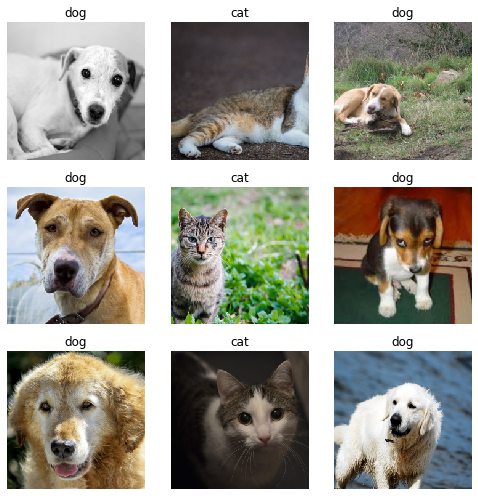

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In the imports above, we imported sub-packages of the sklearn package. Rather than loading the whole sklearn library (which is huge), line 4 just imports datasets and linear_model.

### Load a specific dataset

Next, we will use the imported datasets object. It defines a useful function load_diabetes(). This will return a dataset object which contains the data and metadata.

In [2]:
#| output: false

# Here we will load the diabetes dataset, which is a built-in dataset from sklearn.
full_dataset = datasets.load_diabetes()
print('full_dataset', full_dataset)

full_dataset {'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 1

### Inspect the dataset object to learn about it

It's overwhelming and hard to read what is printed out, but let's dig into this notation because it's frequently used and will help us understand different Python
datatypes.

First, notice that the object starts with {, which means we can treat it like a python dicitonary. Dictionaries are standard ways of expressing key-value pairs. The standard notation for a dictionary is {key1: value1, key2: value2}

Below, we will use a method from the full_dataset object that returns just the keys. This should be easier to parse.

In [3]:
print('dictionary keys:', full_dataset.keys())

dictionary keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


If we want, we can access just one entry in the dictionary using the key. A useful one is the key DESCR.

Print that out using the dictionary [] notation.

In [4]:
print(full_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Access the data array

Use the `'data'` key could also extract the data and assign it to a data_array variable for inspection. Let's also print out the `type` of the object to see what the data format is.

In [5]:
data_array = full_dataset['data']
print('data_array', data_array)
print(type(data_array))

data_array [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
<class 'numpy.ndarray'>


It's a numpy array! That means we can use any of the numpy array functions on it.

## Exercise 1: 

Print out the mean BMI in the dataset, the sum BMI, and the sum of the squared BMI values.
Explain why the sum of the squared BMI is what it is. To do this, you will need to access the right parts of the data array and slice out the right column.

HINT: You will need to read the DESCR to understand which column the BMI is stored in.

HINT 2: To create a new variable with just the desired column of the array, you can use Array slicing notation like a = data_array[:, n] where the : means you want ALL rows, and the n means you want just column n.

HINT 3: You may want to use data_array.sum(), data_array.mean(), and the ** exponent operator.

In [6]:
bmi = data_array[:, 2]

bmi_squared = bmi ** 2

print('Sum: ', bmi.mean())
print('Mean: ', bmi.mean())
print('Sum of squared: ', bmi_squared.mean())

Sum:  -2.2455642172282577e-16
Mean:  -2.2455642172282577e-16
Sum of squared:  0.0022624434389140265


In [7]:
# For conveinence, sklearn also just has an option to get the key parts for the regression ready to use.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


In [8]:

# Look at diabetes_X and notice there are lots of independent variables. Rather than printing the whole
# Array, which would be messy, just look at the .shape attribute.l
# print('diabetes_X', diabetes_X)
print('diabetes_X', diabetes_X.shape)


diabetes_X (442, 10)



For now, we're just going to use a single variable (a single column) for simplicity. The following line extracts just the second column from the array. The colon was necessary because we access arrays using the ROW, COLUMN notation, so we sliced out all ROWS (the colon indicates all) and the second COLUMN.


In [9]:
diabetes_X = diabetes_X[:, 2]
# diabetes_X = np.array([diabetes_X])
# diabetes_X = diabetes_X[:, np.newaxis, 2]
# print('diabetes_X', diabetes_X)
print('diabetes_X', diabetes_X.shape)

# diabetes_X = diabetes_X.reshape((:, 1))
diabetes_X = diabetes_X.reshape((diabetes_X.shape[0], 1))

# print('diabetes_X', diabetes_X)
print('diabetes_X', diabetes_X.shape)


diabetes_X (442,)
diabetes_X (442, 1)



### Split into training and testing arrays (the manual way)

Next we are going to do a very rudimentary split of the data into training and testing sets using array slice notation. The following lines assigns the last all but the last 20 lines to the TRAIN set and the remaining 20 to the test set.

In [10]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


**Create an empty LinearRegression object.**

In the lines below, we will follow a relatively standardized process for running a model:

1. Create the model object.
2. Fit the model.
3. Predict with the model

The basic notation for sklearn below first creates a regression model object using the `linear_model` that we imported above. This model is "empty" in the sense that it has no coefficients identified. Just like othertimes we've encountered objects (like numpy array objects), this object has many functions (called methods) and attributes which can be accessed by the dot operator.

In [11]:
regression_object = linear_model.LinearRegression()
print('regression_object', regression_object)

regression_object LinearRegression()


#### Use the fit method

Use the fit method from our regression object. It takes two inputs, the independent variables (X) and dependent variables (y). 

Below, we will ONLY use the training subset of the data we created above.

In [12]:
regression_object.fit(diabetes_X_train, diabetes_y_train)
print(regression_object)

LinearRegression()


#### Use the fitted model to predict values

Now the regression_object is "trained," which means we can also call it's predict() method which will take some other observations and (in the case of OLS), multiple the new observations against our trained coefficients to make a prediciton.

The predict method returned an array of numerical predictions, which we will look at.

In [13]:
diabetes_y_pred = regression_object.predict(diabetes_X_test)
print(diabetes_y_pred)

[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


#### Look at the coefficients

More interesting might be to look at the coefficients. Once the model has been fit, it has a new attribute .coef_ which stores an array of coefficients. In this case it will only be an array of length 1 because we just have one input.


In [14]:
print('Coefficients: \n', regression_object.coef_)

Coefficients: 
 [938.23786125]


You might be wondering why we are looking at the coefficients as a raw array rather than at a nicely formatted regression table. The reason is in cross-validation approaches, these coefficients might just be one step towards the final model performance check on unseen data.

#### Evaluating the fit

We can use sklearn's built in evaluation functions, such as for the mean squared error or other metrics.

In [15]:
mse = mean_squared_error(diabetes_y_test, diabetes_y_pred)
print('Mean squared error on the TEST data:',  mse)

Mean squared error on the TEST data: 2548.07239872597


In [16]:

# Or perhaps we want the r2 for the second independent variable (which is the only one we used)
r2_score_value = r2_score(diabetes_y_test, diabetes_y_pred)
print('r2 calculated on TEST data: ', r2_score_value)

r2 calculated on TEST data:  0.47257544798227147


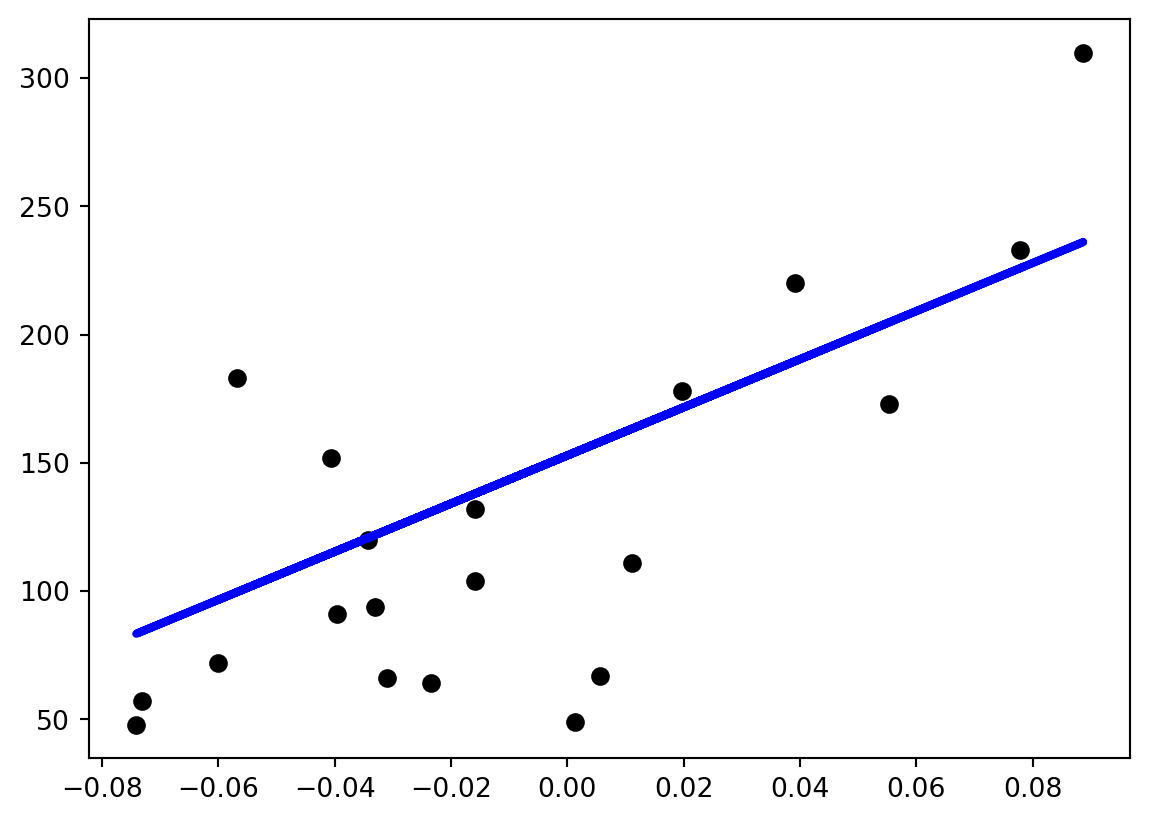

In [17]:
# Finally, to prove to ourselves that we know what we are doing, let's plot this.
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

## Exercise 2.1: Machine Learning OLS Mashup.

Use loops to find which TWO variables best describe the data, as measured by R-squared. This is a hilariously brute-force approach to OLS model selection, but it is similar in some senses to Machine Learning and will be relevant to the cross-validation approaches we discuss next.

In [18]:
# Exercise 2.1 workspace and starter code


full_dataset = datasets.load_diabetes() # Load the full dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) # Get just the data arrays

# Split into training and testing
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

highest_score = 0
for i in range(len(full_dataset['feature_names'])):
    for j in range(len(full_dataset['feature_names'])):
        
        diabetes_current_X_train = diabetes_X_train[:, [i, j]]
        diabetes_current_X_test = diabetes_X_test[:, [i, j]]

        # MISSING STUFF HERE.       
        
        if r2_score_value > highest_score:
            highest_score = r2_score_value
            best_option = [i, j, r2_score_value]
        
print('best_option', best_option)
        
        


best_option [0, 0, 0.47257544798227147]


## Just for completeness, let's look at this the way an econometritian would

Sklearn doesn't report summary statistics in the classic, econometric sense because it focuses on the train, test paradigm, which is not equivilent to a model
performance report (which in the classic case is only reporting performance of the TRAINING data).

Nonetheless, Here's how I do it, using an alternative, more econometrics-focused package. You will need to conda install statsmodel if you want to uncomment this line and have it work. Note that because we're not splitting our data into training and testing, the r-squareds are not really comparable.


In [19]:
import statsmodels
from statsmodels.api import OLS

data_with_constant = statsmodels.api.add_constant(full_dataset.data)
result = OLS(full_dataset.target, data_with_constant).fit().summary()
print(result)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.83e-62
Time:                        14:01:42   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0